In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonatanfragoso/bracol-for-yolov8-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Welder\.cache\kagglehub\datasets\jonatanfragoso\bracol-for-yolov8-detection\versions\6


In [12]:
import os

print(os.listdir(path))

['BRACOL-ORIGINAL-ANNOTATIONS', 'BRACOL_REVIEWED_ANNOTATIONS']


In [13]:
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

test = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

Found 2885 files belonging to 2 classes.
Using 2308 files for training.
Found 2885 files belonging to 2 classes.
Using 577 files for validation.


In [15]:
X_train = np.concatenate([x.numpy() for x, y in train])
y_train = np.concatenate([y.numpy() for x, y in train])

X_test = np.concatenate([x.numpy() for x, y in test])
y_test = np.concatenate([y.numpy() for x, y in test])

In [22]:
X_train = X_train.reshape(2308,224*224*3)
X_test = X_test.reshape(577,224*224*3)

In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
def plot_leaf(image_data):
  image = image_data.reshape((224,224,3))
  plt.imshow(image,cmap = "binary")
  plt.axis("off")

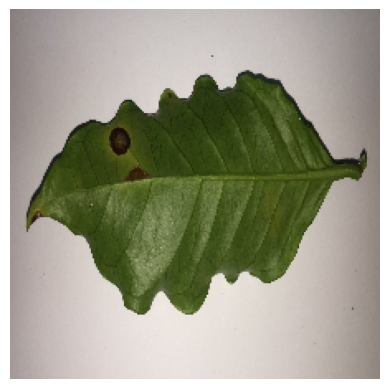

In [ ]:
leaf = X_train[0]
plot_leaf(leaf)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier = RandomForestClassifier(random_state = 42)
rdf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
result = y_train[4]
predict = rdf_classifier.predict([X_train[4]])


print(f"Result: {result}\nPredict: {predict}")

Result: 0
Predict: [0]


In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(rdf_classifier,X_train,y_train,cv = 3, scoring = "accuracy")

array([0.57012987, 0.52015605, 0.52535761])